## RANDOM FOREST 

The more trees in the forest the more robust the forest looks like. In the same way in the random forest classifier, the higher the number of trees in the forest gives the high accuracy results.

`APPROACH`
In the random forest, we grow multiple trees in a model. To classify a new object based on new attributes each tree gives a classification and we say that tree votes for that class. 

The forest chooses the classifications having the most votes of all the other trees in the forest and takes the average difference from the output of different trees. In general, Random Forest built multiple trees and combines them together to get a more accurate result.

While creating random trees it split into different nodes or subsets. Then it searches for the best outcome from the random subsets. This results in the better model of the algorithm. Thus, in a random forest, only the random subset is taken into consideration.

`Possible Uses` : 

__E-Commerce__: When you will find it difficult to recommend or suggest what type of products your customer should see. This is where you can use a random forest algorithm. Using a machine learning system, you can suggest the products which will be more likely for a customer. Using a certain pattern and following the product’s interest of a customer, you can suggest similar products to your customers.

__Banking Sector__: The banking sector consists of most users. There are many loyal customers and also fraud customers. To determine whether the customer is a loyal or fraud, Random forest analysis comes in. With the help of a random forest algorithm in machine learning, we can easily determine whether the customer is fraud or loyal. A system uses a set of a random algorithm which identifies the fraud transactions by a series of the pattern.

		  Random Forest


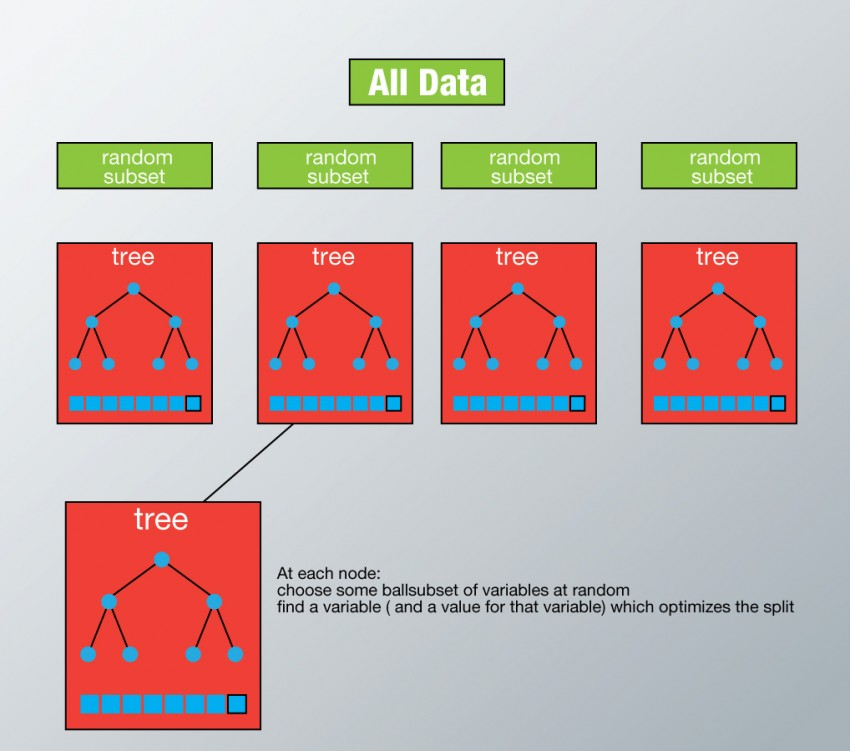

In [0]:
from IPython.display import Image
print("\t\t  Random Forest")
Image(filename='imgr6.jpg',width=450, height=450) 



`Algorithm: `

Assume number of cases in the training set is N. 

Then, sample of these N cases is taken at random but with replacement. 

This sample will be the training set for growing the tree.

If there are M input variables, a number m<M is specified such that at each node, m variables are selected at random out of the M. 

The best split on these m is used to split the node. The value of m is held constant while we grow the forest.

Each tree is grown to the largest extent possible and  there is no pruning.
Predict new data by aggregating the predictions of the ntree trees (i.e., majority votes for classification, average for regression).

`Hyper-Parameters`: 

## I. ***Features which make predictions of the model better***

---
    
a. __max_features__:These are the maximum number of features Random
      Forest is allowed to try in individual tree. 
      
__How does “max_features” impact performance and speed?__

Increasing max_features generally improves the performance of the model as at each node now we have a higher number of options to be considered. However, this is not necessarily true as this decreases the diversity of individual tree which is the USP of random forest. But, for sure, you decrease the speed of algorithm by increasing the max_features. Hence, you need to strike the right balance and choose the optimal max_features.

b. __n_estimators__: This is the number of trees you want to build before taking the maximum voting or averages of predictions. Higher number of trees give you better performance but makes your code slower. You should choose as high value as your processor can handle because this makes your predictions stronger and more stable.
    
c. __min_sample_leaf__ :If you have built a decision tree before, you can appreciate the importance of minimum sample leaf size. Leaf is the end node of a decision tree. A smaller leaf makes the model more prone to capturing noise in train data. Generally we prefer a minimum leaf size of more than 50. However, you should try multiple leaf sizes to find the most optimum for your use case.


## II. ***Features which will make the model training easier/ Parameters to tune model speed.***

---


  
a. __n_jobs__: This parameter tells the engine how many processors is it allowed to use. A value of “-1” means there is no restriction whereas a value of “1” means it can only use one processor. 

b. __random_state__: This parameter makes a solution easy to replicate. A definite value of random_state will always produce same results if given with same parameters and training data. I have personally found an ensemble with multiple models of different random states and all optimum parameters sometime performs better than individual random state.

c. __oob_score__: Aka Out of Bag Score. This is a random forest cross validation method. It is very similar to leave one out validation technique, however, this is so much faster. This method simply tags every observation used in different tress. And then it finds out a maximum vote score for every observation based on only trees which did not use this particular observation to train itself.


### PROBLEM: CLASSIFY BREAST CANCER AS BENIGN OR MALIGNANT
USING RANDOM FOREST CLASSIFIER

In [0]:
#Import Library
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [0]:
RandomForestClassifier?

In [0]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
data.target[[10, 50, 85]]



array([0, 1, 0])

In [0]:
list(data.target_names)

['malignant', 'benign']

In [0]:
# Extract the attributes and labels by calling .data and .target
#Extracting data attributes
X = data.data
### Extracting target/ class labels
y = data.target

print('Number of examples in the data:', X.shape[0])

Number of examples in the data: 569


In [0]:
#First four rows in the variable 'X'
X[:1]


array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01]])

In [0]:

# Create Random Forest object
model= RandomForestClassifier(n_estimators=1000)


In [0]:
# Train the model using the training sets and check score
model.fit(X, y)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [0]:
#Using the train_test_split to create train and test sets.
X_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 47, test_size = 0.25)



In [0]:
#Predict Output
predicted= model.predict(x_test)

In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
print('ROC AUC Score on train data: ', roc_auc_score(y_true=y_train, y_pred=model.predict(X_train)))
print('Accuracy Score on test data: ', accuracy_score(y_true=y_test, y_pred=predicted))



Accuracy Score on train data:  1.0
Accuracy Score on test data:  1.0


In [0]:
print(classification_report(predicted,y_test))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        56
          1       1.00      1.00      1.00        87

avg / total       1.00      1.00      1.00       143



In [0]:
 print(roc_auc_score(y_test, predicted))

1.0


`Observation:` worked with an sklearn breast cancer data set to build a random forest classification model that classifies breast cancer tumors as either “malignant” or “benign”. My original goal was to obtain a model that was at least 95% accurate. After preforming simple EDA to determine the most important features in the data set, analyzing the feature importance of various selected features, and testing different sizes of random forests, I obtained a final model with an accuracy of 100%!

### Exercise 2 : RandomForestRegressor

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [0]:
make_regression?

In [0]:
from sklearn.metrics import roc_auc_score

In [0]:
X, y = make_regression(n_features=4, n_informative=2,random_state=0, shuffle=False)

In [0]:
regr = RandomForestRegressor(max_depth=2, random_state=0)

In [5]:
regr.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [0]:
print(y[0])

49.822907447421905


In [0]:
print(regr.predict([[0, 0, 0, 0]]))

[-2.50699856]


In [16]:
model = RandomForestRegressor(n_estimators = 200, oob_score = True, n_jobs = -1,random_state =50,max_features = "auto", min_samples_leaf = 5)
model.fit(X,y)
y_scores=model.oob_prediction_
print(y_scores[0:5])
predictions= model.predict(X[5:10])

[37.28332025 -8.59618526 12.26044713 17.69852712 10.35060079]


In [0]:
RandomForestRegressor?

In [17]:
model.score(X,y)

0.9505256147754257

In [0]:
regr.score(X,y)

0.8232119396219136

-- LAB ENDS